In [1]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

In [3]:
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        consumerKey = 'jzn0NU9EviCRRbONbUXX9a8VN'
        consumerSecret = 'ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ'
        accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
        accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)

In [4]:
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)

In [5]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [48]:
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()
    screen_name = input("Enter twitter user name to find timeline data: ")
    tweets = api.user_timeline(screen_name, count=20) #=input("Enter twitter user name to find timeline data: "

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)

    # Get average length over all tweets:
    print('Number of Tweets total: %s' % np.mean(df['len']))

    # Get the number of likes for the most liked tweet:
    print('Number of Likes total: %s' % np.max(df['likes']))

    # Get the number of retweets for the most retweeted tweet:
    print('Number of Retweets total: %s' % np.max(df['retweets'])) #'Number of Retweets: ' %s 
    
    print(df.head(11))

Enter twitter user name to find timeline data: code
Number of Tweets total: 130.4
Number of Likes: 929
Number of Retweets: 147
                                               tweets                   id  \
0   RT @codepo8: If you're a user of the Chrome or...  1417873758300385282   
1   RT @pythonvscode: Have you signed up for @euro...  1417607254094893060   
2   Learn about debugging JS apps with VS Code and...  1417559267637284865   
3   RT @TylerLeonhardt: 🚀 In @code insiders today....  1417237638268915716   
4   🔟 We're going live in 10 minutes! Tune in at 1...  1417202585174413315   
5   Learn to build web apps with @vuejs and @code ...  1416827867481190400   
6   (New date 🗓) Learn about debugging frontend we...  1416445857499582467   
7   Using VS Code and #WSL on Windows? Here are so...  1416146627409195011   
8   RT @stuartleeks: Want to be able to open a fol...  1416117548936953857   
9   A VS Code theme for all the times that you wis...  1416102091945349124   
10  RT @mattbie

Text(0.5, 1.0, 'Twitter User unspokenprophcy Likes & Retweets chart')

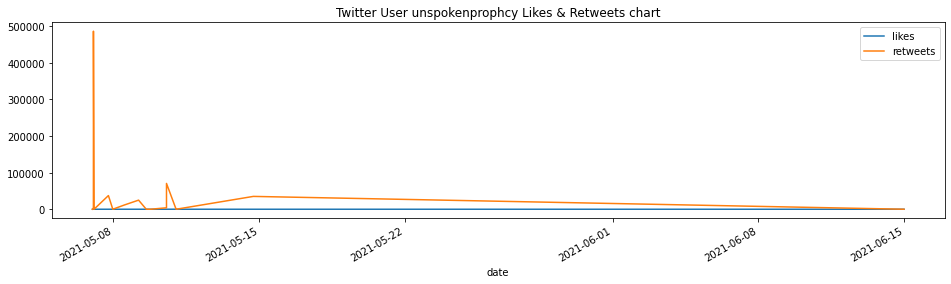

In [29]:
#Line Chart of twitter user's likes and retweets
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.title("Twitter User " + screen_name + " Likes & Retweets chart") 

In [49]:
import sys
!{sys.executable} -m pip install numpy

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [52]:
!pip install WordCloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
Using legacy 'setup.py install' for WordCloud, since package 'wheel' is not installed.
    Running setup.py install for WordCloud: started
    Running setup.py install for WordCloud: finished with status 'error'


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\black\appdata\local\programs\python\python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\black\\AppData\\Local\\Temp\\pip-install-lsw1v2tb\\wordcloud_e31ea21d83a64672a35c42d9b99a9934\\setup.py'"'"'; __file__='"'"'C:\\Users\\black\\AppData\\Local\\Temp\\pip-install-lsw1v2tb\\wordcloud_e31ea21d83a64672a35c42d9b99a9934\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\black\AppData\Local\Temp\pip-record-zr521tcq\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\black\appdata\local\programs\python\python39\Include\WordCloud'
         cwd: C:\Users\black\AppData\Local\Temp\pip-inst

In [53]:
consumerKey = 'jzn0NU9EviCRRbONbUXX9a8VN'
consumerSecret = 'ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ'
accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [65]:
#Define tweetSearch
def tweetSearch(query, limit = 1000, language = "en", remove = []):  
    text = ""
    for tweet in tweepy.Cursor(api.search, q=query, lang=language).items(limit):
        text += tweet.text.lower()
    #removed unwanted words
    removeWords = ["https","co"]
    removeWords += remove
    #Replace unwanted words with empty space
    text = text.replace(word, "") 
    #return clean text
    return text
#     search = tweetSearch(“datascience”)
#     wordcloud = WordCloud().generate(search)

In [66]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation=’bilinear’)
plt.axis(“off”)
plt.show()search = tweetSearch(“datascience”)

SyntaxError: invalid character '’' (U+2019) (<ipython-input-66-f430b6316ae2>, line 2)